# Sample Factor Graph

In [1]:
using AutomotiveDrivingModels
using AutoViz
using AutoScenes
using Records
using HDF5, JLD
using PGFPlots
using Parameters

include("../AutoMobius/AutoMobius.jl")
using AutoMobius

include("../crit_cluster_sampling/sample_factor_graph.jl")
"DONE"

"DONE"

In [4]:
model = @AutoScenes.load_factor_model("../data/1d_factorgraph_model_0726.txt")
model = create_penalty_model_from_global(model)

LoadError: [91mUndefVarError: v_crit not defined[39m

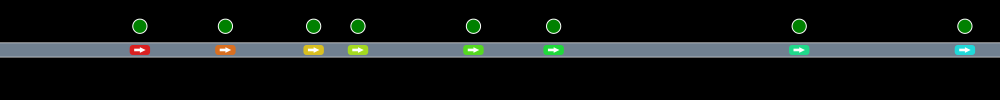

In [3]:
srand(0)
timestep = 0.1
scenegen = BayesNets1DSceneModel()
scene = MobiusScene()
roadway = Wraparound(Straight1DRoadway(200.0))
models = Dict{Int, LaneFollowingDriver}()
behgen = ErrorableIDMBehaviorGenerator(timestep)

rand!(scene, scenegen, roadway)
rand!(models, behgen, scene)

cam = StaticCamera(VecE2(100.0,0.0), 4.75)
car_colors = get_pastel_car_colors(scene)
render(scene, roadway, [AttentionOverlay(id, model) for (id,model) in models], 
       cam=cam, canvas_height=100, car_colors=car_colors)

In [5]:
factorgraph = FactorGraph(model.features, scene, roadway)
gen = FactorGraphSceneGenerator(model, Dict(:s => Normal(0.0,5.0), :v => Normal(0.0,1.0)), 100)

FactorGraphSceneGenerator(burnin=100)

In [5]:
srand(0)
Δ = metropolis_hastings!(gen, factorgraph)

24-element Array{Float64,1}:
 -27.0519  
   2.72601 
   0.0     
 -11.1321  
  -5.75977 
   0.0     
 -18.7688  
   1.39435 
   0.0     
  17.9644  
  -6.1659  
   0.0     
   6.56588 
   1.34205 
   0.0     
  13.4973  
  -2.29846 
   0.0     
 -18.046   
  -3.9373  
   0.0     
 -20.2491  
   0.158927
   0.0     

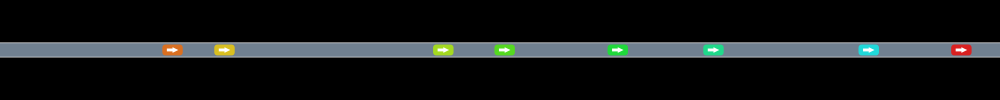

In [7]:
scene2 = shift_scene!(MobiusScene(), scene, Δ, factorgraph)
render(scene2, roadway, cam=cam, canvas_height=100, car_colors=car_colors)